- Lakshmikar Readdy Polamreddy
- Haider Ali
- AIM 5003 - Numerical Methods
- Project #1: Simulating a Robotic Arm

In [1]:
# Importing libraries

import math
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from time import time
import numpy as np

## Project Overview:

This project concerns a two-dimensional version of the Stewaart platform. It will model a manipulator composed of a triangular platform in a fixed plane controlled by three struts. Finding the position of the platform, given the three strut lengths, is called the forward kinematics problem for this manipulator. Below steps indicate the flow of the project work in a sequential manner.
- **Step 1:** Creating a function to find the position of the planar Stewart platform
- **Step 2:** Visualizing the function
- **Step 3:** Constructing the schmeatic of Stewart platform
- **Step 4:** Solving the forward kinematics problem
- **Step 5:** Resolving the problem for various parameters
- **References**

### Step 1: Creating a function to find the position of the planar Stewart platform
- Define a function in terms of x,y and $\theta$
- Test the function for the values of theta -π/4 and +π/4 to know if these are the roots or not  

#### 1.1 : Defining a function

In [40]:
def f(theta):
    A2 = L3*math.cos(theta)-x1
    B2 = L3*math.sin(theta)
    A3 = L2*(math.cos(theta+gamma))-x2
    B3 = L2*(math.sin(theta+gamma))-y2
    N1 = B3*(p2**2-p1**2-A2**2-B2**2)-B2*(p3**2-p1**2-A3**2-B3**2)
    N2 = -A3*(p2**2-p1**2-A2**2-B2**2)+A2*(p3**2-p1**2-A3**2-B3**2)
    D = 2*(A2*B3-B2*A3)
    x = round(N1/D,5)
    y = round(N2/D,5)
    f_of_theta = round((N1**2+N2**2-p1**2*(D**2)),5)

    return x,y,f_of_theta

#### 1.2 : Testing the function for -π/4 and +π/4

In [41]:
L1 = 2
L2 = math.sqrt(2); L3 = math.sqrt(2)
gamma = math.pi/2
p1 = math.sqrt(5); p2 = math.sqrt(5); p3 = math.sqrt(5)
x1 = 4; x2 = 0; y2 = 4

pi = math.pi
theta = [-pi/4, +pi/4]

x_values = []; y_values = []; f_values = []
for i in theta:
    x,y,f_of_theta = f(i)
    x_values.append(x)
    y_values.append(y)
    f_values.append(f_of_theta)

data = pd.DataFrame(list(zip(x_values,y_values,theta,f_values)), columns = ['x','y','theta','f_of_theta']) # creating table to display values 
print(data)

     x    y     theta  f_of_theta
0  1.0  2.0 -0.785398        -0.0
1  2.0  1.0  0.785398        -0.0


Observation: f($\theta$) is zero at +π/4 and -π/4, which clearly indicates that these values are the roots of this function

### Step 2: Visualizing the function
- Find the values of x,y and f($\theta$) for the θ values betwen -pi and +pi
- Plot the graph between $\theta$ and f($\theta$) to visually identify if f($\theta$) intersects x-asis at -pi/4 and +pi/4

#### 2.1 Finding and tabulating the values of x,y, f($\theta$) for $\theta$ values between -pi and +pi

In [51]:
theta = np.linspace(-pi, pi, 50)
        
x_values = []; y_values = []; f_values = []
for i in theta:
    x,y,f_of_theta = f(i)
    x_values.append(x)
    y_values.append(y)
    f_values.append(f_of_theta)
    
data = pd.DataFrame(list(zip(x_values,y_values,theta,f_values)), columns = ['x','y','theta','f_of_theta']) # creating table to display values 
print(data)

          x        y     theta   f_of_theta
0   2.70711  2.70711 -3.141593  33192.28858
1   2.61088  2.79172 -3.013364  32823.64961
2   2.50462  2.86334 -2.885136  31739.67546
3   2.39008  2.92078 -2.756908  30004.24024
4   2.26913  2.96311 -2.628680  27717.50446
5   2.14376  2.98961 -2.500451  25007.20387
6   2.01603  2.99987 -2.372223  22017.82497
7   1.88804  2.99371 -2.243995  18898.82928
8   1.76188  2.97124 -2.115766  15793.15315
9   1.63964  2.93281 -1.987538  12827.12628
10  1.52331  2.87907 -1.859310  10102.73407
11  1.41481  2.81090 -1.731082   7692.82857
12  1.31592  2.72941 -1.602853   5639.51649
13  1.22826  2.63594 -1.474625   3955.56965
14  1.15328  2.53203 -1.346397   2628.36581
15  1.09219  2.41939 -1.218169   1625.61737
16  1.04602  2.29986 -1.089940    902.01054
17  1.01550  2.17540 -0.961712    405.87056
18  1.00116  2.04807 -0.833484     85.08149
19  1.00321  1.91994 -0.705255   -108.30217
20  1.02163  1.79313 -0.577027   -215.04602
21  1.05612  1.66972 -0.448799  

### 2.2 Plotting $\theta$ vs f($\theta$)

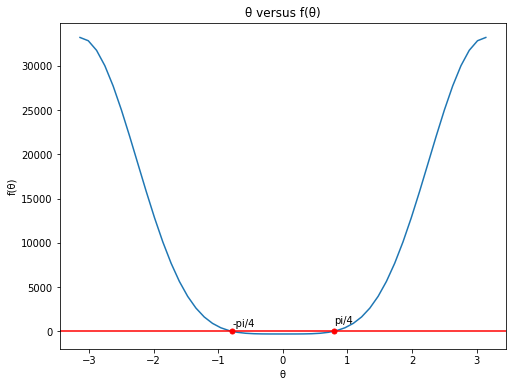

In [52]:
plt.figure(figsize = (8,6))
plt.plot(data.theta, data.f_of_theta)
plt.plot(math.pi/4,0, 'o', markersize=5, color = 'red')
plt.plot(-math.pi/4,0, 'o', markersize=5, color = 'red')

plt.axhline(y=0, color = 'r')
plt.title('θ versus f(θ)')
plt.xlabel('θ')
plt.text(-pi/4, 500, "-pi/4")
plt.text(pi/4, 900, "pi/4")
plt.ylabel('f(θ)')
plt.show()

Observation: This graph shows that f($\theta$) has roots at -$\pi$ and +$\pi$/4.

### Step 3: Constructing the schematic of planar stewart platform
- Plotting the stewart platform poses for $\theta$ values -$\pi$/4 and +$\pi$/4 by means of struts, anchor points and triangle

#### 3.1 Plotting pose1 of Stewart platform at $\theta$ -$\pi$/4

In [53]:
def pose(theta, gamma):
    x0=0 
    y0=0 
    x1=4
    y1=0
    x2=0
    y2=4
    x=f(theta)[0]
    y=f(theta)[1]
    u1=x
    v1=y
    u2= x+L2*math.cos(theta+gamma)
    v2= y+L2*math.sin(theta+gamma)
    u3= x+L3*math.cos(theta)
    v3= y+L3*math.sin(theta)

    plt.plot([u1, u2, u3, u1],[v1, v2, v3, v1],'r')
    plt.plot([x0,x1,x2],[y0,y1,y2],'bo')

    plt.plot([x0, u1],[y0, v1],'g')
    plt.plot([x1,u3],[y1,v3],'g')
    plt.plot([x2, u2],[y2,v2],'g');

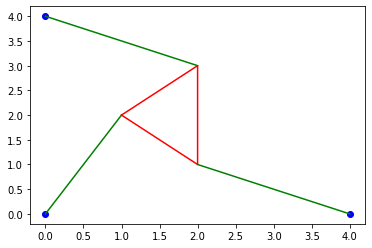

In [54]:
pose(-pi/4, math.pi/2)

#### 3.2 Plotting pose2 of Stewart platform at $\theta$ +pi/4

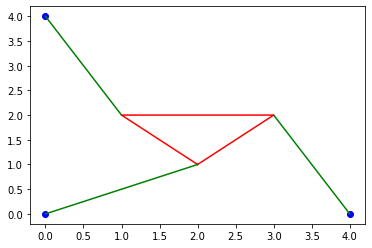

In [55]:
pose(pi/4, math.pi/2)

### Step 4: Solving the forward Kinematics problem
- Finding the values of x,y and $\theta$ for given strut lengths
- Finding f($\theta$) for various values of $\theta$ and plot it to know the approximate roots
- Finding the roots using Bisection method
- Finding the roots using Newton's method
- Comparing the resluts
- Plotting the poses at these roots

### 4.1 Plot f(θ) for the input parameters given in activity 4

In [56]:
L1 = 3; L3 = 3
L2 = 3*math.sqrt(2)
gamma = math.pi/4
p1 = 5; p2 = 5; p3 = 3
x1 = 5; x2 = 0; y2 = 6

pi = math.pi

theta = np.linspace(-pi, pi, 50)

x_values = []; y_values = []; f_values = []
for i in theta:
    x,y,f_of_theta = f(i)
    x_values.append(x)
    y_values.append(y)
    f_values.append(f_of_theta)
    
data = pd.DataFrame(list(zip(x_values,y_values,theta,f_values)), columns = ['x','y','theta','f(theta)']) # creating table to display values 
print(data)

          x         y     theta      f(theta)
0   4.00000   4.55556 -3.141593  243712.00000
1   3.76357   4.85092 -3.013364  275446.96359
2   3.49430   5.12231 -2.885136  300372.74566
3   3.19552   5.36523 -2.756908  316760.05448
4   2.87122   5.57582 -2.628680  323489.94999
5   2.52588   5.75089 -2.500451  320163.32411
6   2.16445   5.88799 -2.372223  307135.88944
7   1.79224   5.98545 -2.243995  285474.84486
8   1.41483   6.04242 -2.115766  256842.98373
9   1.03802   6.05895 -1.987538  223324.80199
10  0.66768   6.03601 -1.859310  187215.97910
11  0.30977   5.97554 -1.731082  150801.55325
12 -0.02978   5.88054 -1.602853  116148.70425
13 -0.34508   5.75514 -1.474625   84937.27226
14 -0.63022   5.60471 -1.346397   58345.42490
15 -0.87928   5.43613 -1.218169   37000.08372
16 -1.08608   5.25802 -1.089940   20992.95517
17 -1.24389   5.08135 -0.961712    9954.51397
18 -1.34476   4.92024 -0.833484    3171.22626
19 -1.37846   4.79344 -0.705255    -273.38407
20 -1.33041   4.72669 -0.577027   

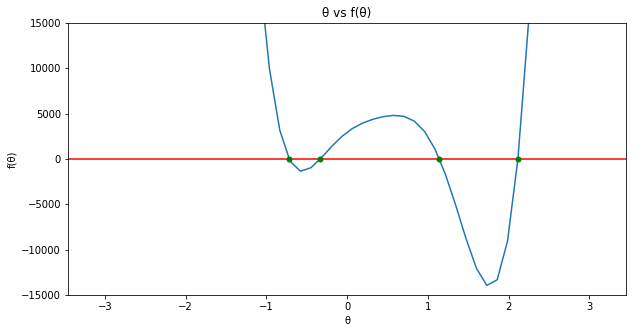

In [70]:
plt.figure(figsize = (10,5))
plt.plot(data.theta, data["f(theta)"])
plt.axhline(y=0, color = 'r')
plt.title('θ vs f(θ)')
# plt.ylim(-25000)
plt.ylim(-1.5 * 10**4,1.5 * 10**4)
for i in [-0.7208404541015625, -0.3310089111328125, 1.1436920166015625, 2.115907287597656]:
    plt.plot(i,0, 'o', markersize=5, color = 'green')
plt.xlabel('θ')
plt.ylabel('f(θ)')
plt.show()

Observations: The curve is intersecting the X-axis at 4 different points and so, we find the approximate roots using Bisection method and Newton method

### 4.2 Finding the roots using bisection method

In [71]:
def bisection_method(a, b, tol):
    if f(a)[2]*f(b)[2] > 0:
        #end function, no root.
        print("No root found.")
    else:
        i = 0
        while (b - a)/2.0 > tol:
            midpoint = (a + b)/2.0
            if f(midpoint) == 0:
                return(i, midpoint) #The midpoint is the x-intercept/root.
            elif f(a)[2]*f(midpoint)[2] < 0: # Increasing but below 0 case
                b = midpoint
            else:
                a = midpoint
            i += 1
        return(i, midpoint)

In [72]:
Bisect_times = [] 
a = [-1, -0.5, 1, 1.5]
b = [-.5, 0, 1.5, 2.2]
Bisect_roots = []
Bisect_iterations = []
for i in range(4):
    start = time()
    itr, root = bisection_method(a[i],b[i],0.00001)
    Bisect_roots.append(root)
    Bisect_iterations.append(itr)
    Bisect_times.append(time()-start)

print('Roots as per bisection method for 4 poses:', Bisect_roots)

Roots as per bisection method for 4 poses: [-0.7208404541015625, -0.3310089111328125, 1.1436920166015625, 2.115907287597656]


### 4.3 Finding the roots using Newton's method

In [73]:
def newtons_method(x0,tol,iter):
   
    i = 0
    while i<iter:
        i = i+1
        dx = (f(x0+0.1)[2]-f(x0)[2])/0.1 # slope = y2-y1/(x2-x1)
        x1 = x0 - f(x0)[2]/dx
        
        if (abs(x1-x0)<tol):
            return i, x1
        x0 = x1
        

In [74]:
Newton_times = [] 
x0s = [-1, -0.4, 1, 2]
tols = [0.00001, 0.00001, 0.00001, 0.00001]
iterations = [15, 10, 10, 10] 
Newton_roots = []
Newton_iterations = []
for i in range(4):
    start = time()
    itr, root = newtons_method(x0s[i],tols[i], iterations[i])
    Newton_roots.append(root)
    Newton_iterations.append(itr)
    Newton_times.append(time()-start)

print('Roots as per Newton method for 4 poses:', Newton_roots)

Roots as per Newton method for 4 poses: [-0.7208521135473132, -0.3310052209084637, 1.1436865082857162, 2.1159095044720106]


In [75]:
comp_df = pd.DataFrame({"Newton roots" :Newton_roots, "Bisection roots": Bisect_roots,"Newton_Times": Newton_times,"Bisection_Times":Bisect_times, \
              "Newton_Itr": Newton_iterations,"Bisection_Itr": Bisect_iterations}, index = ["Root 1", "Root 2", "Root 3", "Root 4"])
comp_df["Newton_time-Bisection_time"] = comp_df.Newton_Times - comp_df.Bisection_Times
comp_df["Newton_Itr-Bisection_Itr"] = comp_df.Newton_Itr - comp_df.Bisection_Itr
comp_df

Newton roots  Bisection roots  Newton_Times  Bisection_Times  \
Root 1     -0.720852        -0.720840      0.000398         0.000423   
Root 2     -0.331005        -0.331009      0.000108         0.000484   
Root 3      1.143687         1.143692      0.000121         0.000467   
Root 4      2.115910         2.115907      0.000133         0.001171   

        Newton_Itr  Bisection_Itr  Newton_time-Bisection_time  \
Root 1          15             15                   -0.000025   
Root 2           4             15                   -0.000376   
Root 3           5             15                   -0.000346   
Root 4           6             16                   -0.001038   

        Newton_Itr-Bisection_Itr  
Root 1                         0  
Root 2                       -11  
Root 3                       -10  
Root 4                       -10

- Observations: 
    - The roots obtained in Newtons and Bisection method are almost similar.
    - Except for root 1, the computational time taken by Bisection method is more than that of the Newton's method.
    - Except for root 1, the number of iterations taken by Bisection method are approximately thrice to that of Newton's method.

### 4.4 Plotting these four poses

In [76]:
def poses_four(theta,gamma):
    L1 = 3; L3 = 3
    L2 = 3*math.sqrt(2)
    p1 = 5; p2 = 5; p3 = 3
    x0=0 
    y0=0 
    x1=5
    y1=0
    x2=0
    y2=6
    x=f(theta)[0]
    y=f(theta)[1]
    u1=x
    v1=y
    u2= x+L2*math.cos(theta+gamma)
    v2= y+L2*math.sin(theta+gamma)
    u3= x+L3*math.cos(theta)
    v3= y+L3*math.sin(theta)

    plt.plot([u1, u2, u3, u1],[v1, v2, v3, v1],'r')
    plt.plot([x0,x1,x2],[y0,y1,y2],'bo')

    plt.plot([x0, u1],[y0, v1],'g')
    plt.plot([x1,u3],[y1,v3],'g')
    plt.plot([x2, u2],[y2,v2],'g');

#### 4.4.1 Plotting pose 1 at root 1: -0.7208

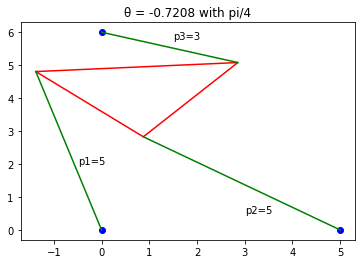

In [77]:
plt.title("θ = -0.7208 with pi/4")
plt.text(1.5, 5.8, "p3=3")
plt.text(3, 0.5, "p2=5")
plt.text(-0.5, 2, "p1=5")
poses_four(-0.7208, math.pi/4)

#### 4.4.2 Pose 2 at root 2: -0.3310

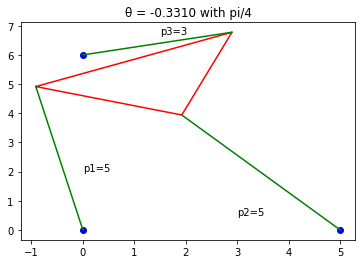

In [78]:
plt.title("θ = -0.3310 with pi/4")
plt.text(0, 2, "p1=5")
plt.text(3, 0.5, "p2=5")
plt.text(1.5, 6.7, "p3=3")
poses_four(-0.3310, math.pi/4)

#### 4.4.3 Pose 3 at root 3: 1.143

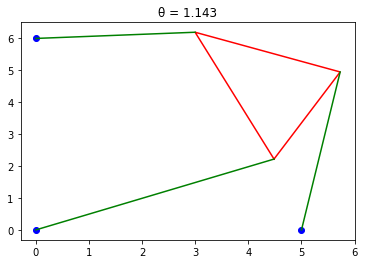

In [79]:
plt.title("θ = 1.143")
poses_four(1.143, math.pi/4)

#### 4.4.4 Pose 4 at root 4: 2.159

In [80]:
plt.title("θ = 2.159")
poses_four(2.159, math.pi/4)

### 4.4 Tabulating the values of x,y,$\theta$ for these 4 roots

In [81]:
theta = [-0.7208, -0.3310, 1.143, 2.1159]

x_values = []; y_values = []; f_values = []
for i in theta:
    x,y,f_of_theta = f(i)
    x_values.append(x)
    y_values.append(y)
    f_values.append(f_of_theta)
    
data = pd.DataFrame(list(zip(x_values,y_values,theta)), columns = ['x','y','theta']) # creating table to display values 
print(data)

         x        y   theta
0 -1.37838  4.80621 -0.7208
1 -0.91469  4.91563 -0.3310
2  4.48321  2.21979  1.1430
3  4.57183  2.02443  2.1159


### Step 5 : Re-solving the problem for different values of parameters
- Resolving the forward kinematics problem using strut length p2 = 7
- Finding the roots using Newtons method
- Plotting the poses at these roots
- Calculating p2 intervals for various poses
- Calculating strut length p2 for which there are only 2 poses

### 5.1 Resolving the problem using strut length p2 = 7

In [84]:
L1 = 3; L3 = 3
L2 = 3*math.sqrt(2)
gamma = math.pi/4
p1 = 5; p2 = 7; p3 = 3
x1 = 5; x2 = 0; y2 = 6

pi = math.pi

theta = np.linspace(-pi, pi, 50)

x_values = []; y_values = []; f_values = []
for i in theta:
    x,y,f_of_theta = f(i)
    x_values.append(x)
    y_values.append(y)
    f_values.append(f_of_theta)
    
data = pd.DataFrame(list(zip(x_values,y_values,theta,f_values)), columns = ['x','y','theta','f(theta)']) # creating table to display values 
print(data)

          x        y     theta      f(theta)
0   2.50000  5.05556 -3.141593  141184.00000
1   2.23863  5.27322 -3.013364  169623.12674
2   1.94256  5.46611 -2.885136  193246.47997
3   1.61505  5.62925 -2.756908  210393.44159
4   1.25990  5.75823 -2.628680  219920.15932
5   0.88135  5.84924 -2.500451  221310.24968
6   0.48405  5.89915 -2.372223  214716.37949
7   0.07292  5.90550 -2.243995  200928.48086
8  -0.34695  5.86656 -2.115766  181273.63831
9  -0.77042  5.78128 -1.987538  157461.21195
10 -1.19238  5.64937 -1.859310  131393.37428
11 -1.60788  5.47121 -1.731082  104965.06185
12 -2.01226  5.24789 -1.602853   79877.89585
13 -2.40128  4.98112 -1.474625   57489.88924
14 -2.77121  4.67326 -1.346397   38717.17509
15 -3.11900  4.32725 -1.218169   23996.39880
16 -3.44238  3.94659 -1.089940   13307.92137
17 -3.73997  3.53544 -0.961712    6251.79917
18 -4.01138  3.09875 -0.833484    2161.78385
19 -4.25712  2.64270 -0.705255     238.24207
20 -4.47840  2.17572 -0.577027    -320.51805
21 -4.6760

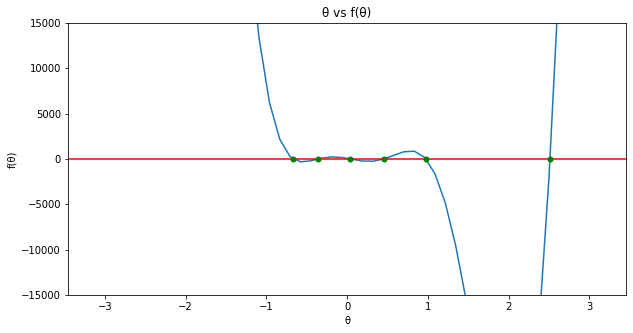

In [92]:
# fig = px.line(data, x='theta', y='f(theta)')
# fig.add_hline(y=0)
# fig.show()

plt.figure(figsize = (10,5))
plt.plot(data.theta, data["f(theta)"])
plt.axhline(y=0, color = 'r')
plt.title('θ vs f(θ)')
# plt.ylim(-25000)
plt.ylim(-1.5 * 10**4,1.5 * 10**4)
roots = [-0.6731527694061441, -0.3547386305119077, 0.03776679619407171, 0.4588784586855585, 0.977675583671826, 2.5138530261625656]
for i in roots:
    plt.plot(i,0, 'o', markersize=5, color = 'green')
plt.xlabel('θ')
plt.ylabel('f(θ)')
plt.show()

### 5.2 Finding the 6 poses using Newtons method

In [87]:
root1 = newtons_method(-1,0.00001,100)[1]
root2 = newtons_method(-0.5,0.00001,100)[1]
root3 = newtons_method(0,0.00001,100)[1]
root4 = newtons_method(0.5,0.00001,100)[1]
root5 = newtons_method(1,0.00001,100)[1]
root6 = newtons_method(2.2,0.00001,100)[1]

print('Roots as per bisection method for 6 poses:', root1, root2, root3, root4, root5, root6)

Roots as per bisection method for 6 poses: -0.6731527694061441 -0.3547386305119077 0.03776679619407171 0.4588784586855585 0.977675583671826 2.5138530261625656


### 5.3 Plotting the 6 poses at these roots

In [25]:
def poses_six(theta):
    gamma = math.pi/4
    L1 = 3; L3 = 3
    L2 = 3*math.sqrt(2)
    p1 = 5; p2 = 7; p3 = 3
    x0=0 
    y0=0 
    x1=5
    y1=0
    x2=0
    y2=6
    x=f(theta)[0]
    y=f(theta)[1]
    u1=x
    v1=y
    u2= x+L2*math.cos(theta+gamma)
    v2= y+L2*math.sin(theta+gamma)
    u3= x+L3*math.cos(theta)
    v3= y+L3*math.sin(theta)

    plt.plot([u1, u2, u3, u1],[v1, v2, v3, v1],'r')
    plt.plot([x0,x1,x2],[y0,y1,y2],'bo')

    plt.plot([x0, u1],[y0, v1],'g')
    plt.plot([x1,u3],[y1,v3],'g')
    plt.plot([x2, u2],[y2,v2],'g');

#### 5.3.1 Plotting pose 1 at root 1: -0.6731

In [26]:
poses_six(-0.6731)

#### 5.3.2 Plotting pose 2 at root 2: -0.3547

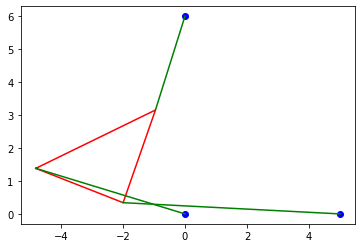

In [27]:
poses_six(-0.3547)

#### 5.3.3 Plotting pose 3 at root 3: 0.0377

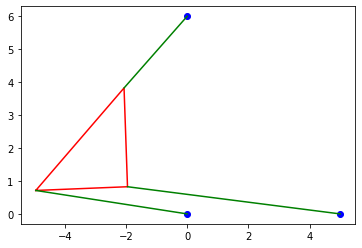

In [28]:
poses_six(0.0377)

#### 5.3.4 Plotting pose 4 at root 4: 0.4588

In [29]:
poses_six(0.4588)

#### 5.3.5 Plotting pose 5 at root 5: 0.9766

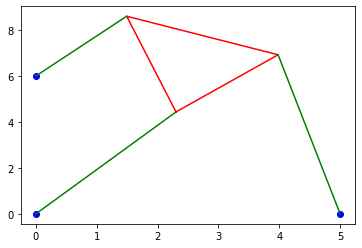

In [30]:
poses_six(0.9776)

#### 5.3.6 Plotting pose 6 at root 6: 2.5138

In [31]:
poses_six(2.5138)

### 5.4 Calculating intervals in p2 for various poses
- Plot θ versus f(θ) for various values of p2
- Identify the number of points of inetersection between f(θ) and x-asis to identify the number of poses

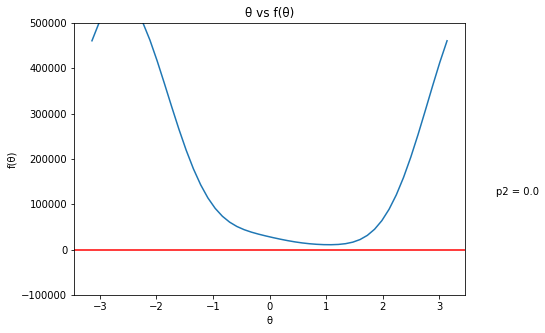

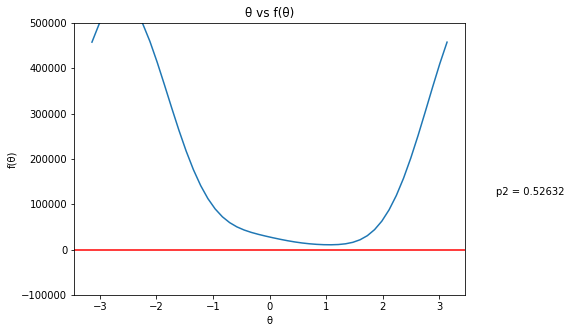

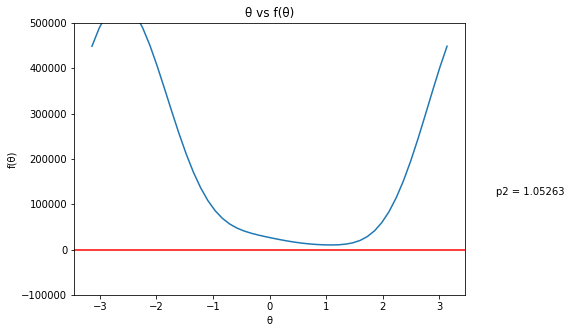

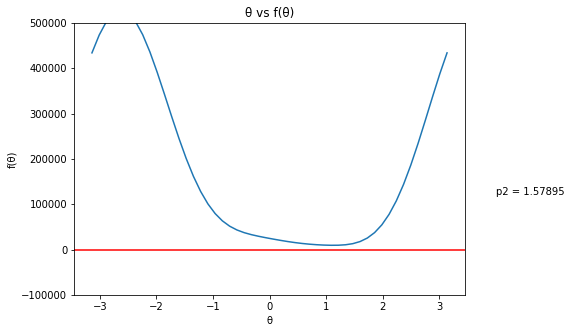

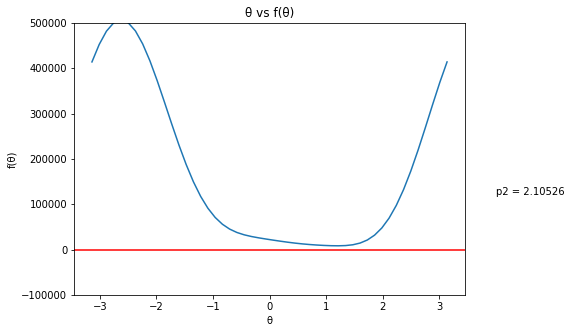

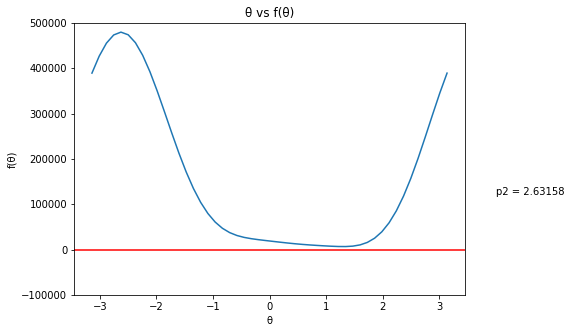

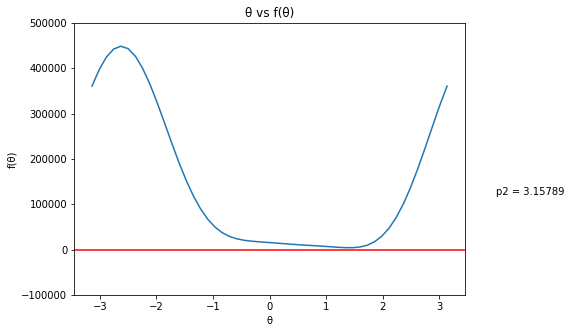

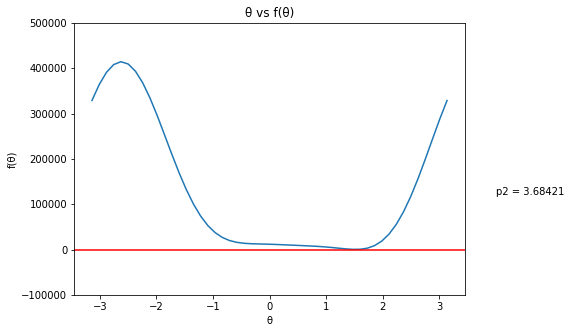

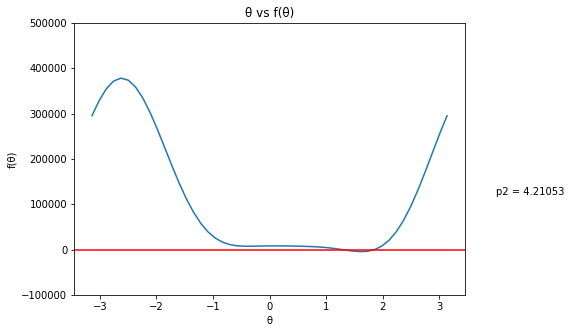

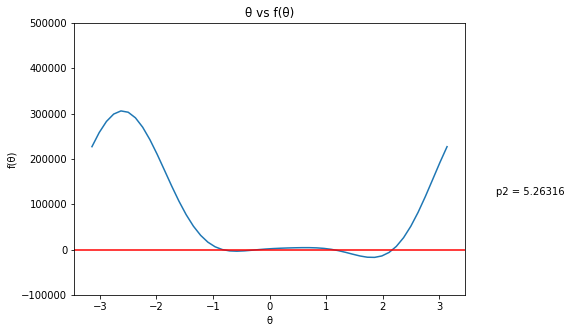

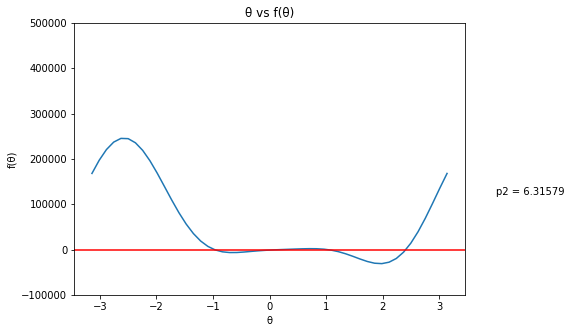

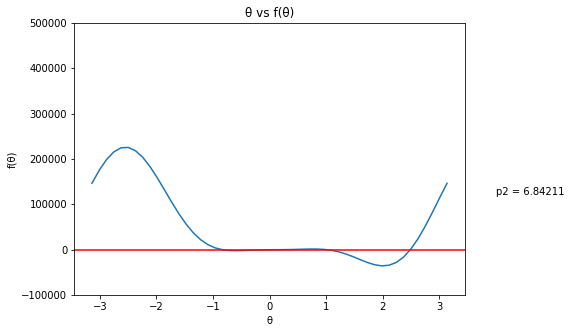

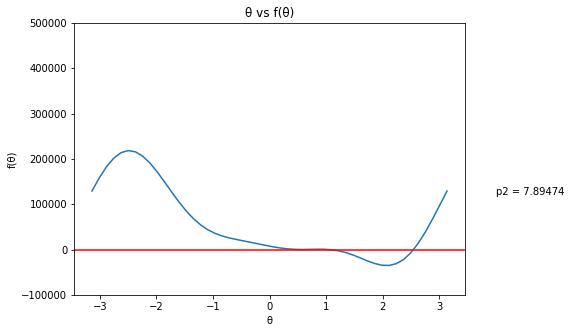

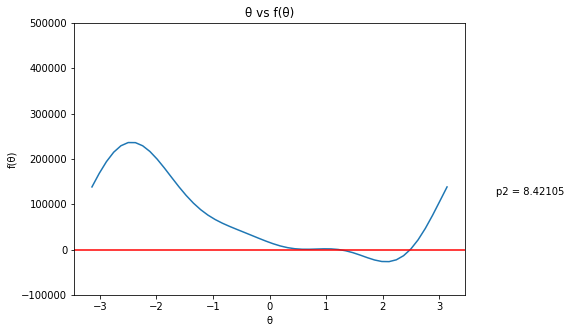

In [33]:
p2 = np.linspace(0,10,20)
for j in p2:
    L1 = 3; L3 = 3
    L2 = 3*math.sqrt(2)
    gamma = math.pi/4
    p1 = 5; p2 = j; p3 = 3
    x1 = 5; x2 = 0; y2 = 6
    pi = math.pi
    θ = np.linspace(-pi, pi, 50)

    x_values = []; y_values = []; f_values = []
    for i in theta:
        x,y,f_of_theta = f(i)
        x_values.append(x)
        y_values.append(y)
        f_values.append(f_of_theta)

    data = pd.DataFrame(list(zip(x_values,y_values,theta,f_values)), columns = ['x','y','theta','f_of_theta']) # creating table to display values 


    plt.figure(figsize = (7,5))
    plt.ylim(-100000, 500000)   
    plt.plot(data.theta, data.f_of_theta)
    plt.axhline(y=0, color = 'r')
    plt.text(4, 120000, 'p2 = {}'.format(round(j, 5)))
    plt.title('θ vs f(θ)')
    plt.xlabel('θ')
    plt.ylabel('f(θ)')
    plt.show()   

Results from the above plots to an accuracy of 0.2 in p2 intervals:

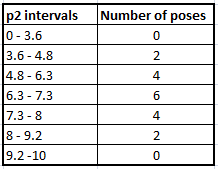

### 5.5 Finding the strut length p2 for two poses in Step 4

Based on the results of Step-5.4, we can conclude that there will be 2 poses for any value of p2 in the below range.
- 3.6 ≤ p2 ≤ 4.8
- 8 ≤ p2 ≤ 9.2
- Above results have been captured to an accuracy of 0.2

### References:
https://stackoverflow.com/questions/73989860/newtons-method-defined-function-while-loop-no-output

https://www.geeksforgeeks.org/newtons-method-for-finding-roots/

https://stackoverflow.com/questions/73980595/how-do-i-use-newtons-method-on-python-to-solve-a-system-of-equations

https://www.youtube.com/watch?v=5wCK6XGC3ig, https://www.youtube.com/watch?v=-5e2cULI3H8

https://www.youtube.com/watch?v=W7S94pq5Xuo

https://www.youtube.com/watch?v=U0xlKuFqCuI

A text book Numerical Analysis (2017, Pearson) by Timothy Sauer